#**Name:** Varsha
#**Roll No:** 200030040

##**AIM**



*   To understand the time domain characteristics of voiced and unvoiced speech
*   To perform the voiced/unvoiced/silence classification of speech




## **THEORY**



*   In this lab, we had to record 'Speech Signal' at 16 kHz and 16 bits to analyse its time domain charecteristics. Time domain charecteristics can provide us with the information of energy and durations for each type of sound production. We can also obtain the Energy and Zero crossing rate using time domain analysis.
*   As speech signals are non-stationary, the energy calculated over the whole time doesn't offer any information about the changes in frequency. So, we use Short term Energy,i.e, calculation of energy over a short period of time where the signals can be roughly stationary.
*   Zero crossing rate is the number of times the waveform crosses the time axis. Even this is calculated over short intervals of time. (Each sine wave has zero crossing =2)


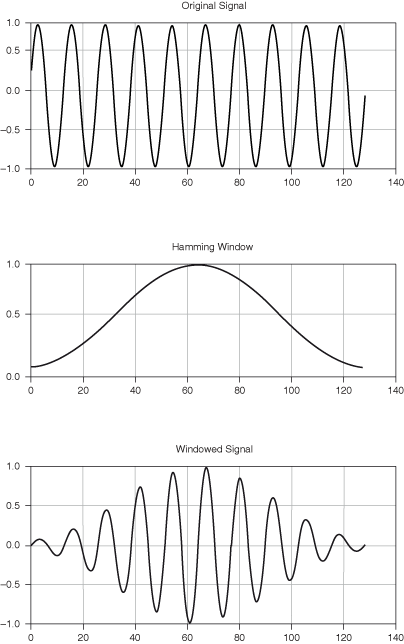


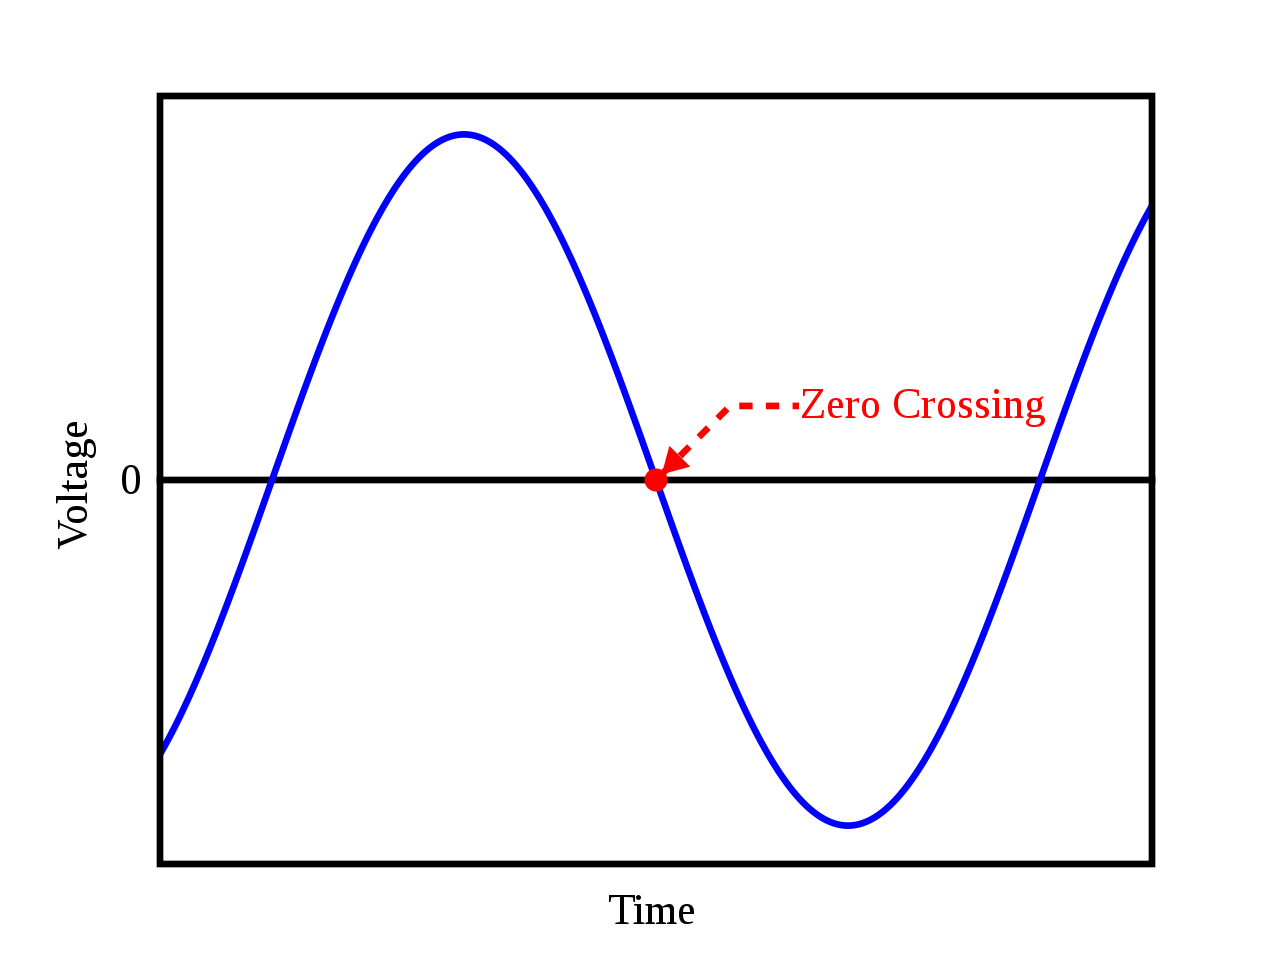




##**EXPERIMENTAL PROCEDURE:**



*   Upload the audio file in .wav format.
*   Plot the time domain and frequency domain plots of the whole audio file using librosa and numpy.
*   Identify the timestamps for /s/, /ch/, /E/, /n/, silence from the audio file.
*   With given frame size and frame shift, calculate the number of frames possible for each sound. Calculate short term energy of each sound by calculating the sum of squares of values in the array of sound for each frame separately.
*   Similarly for short term zero crossing rate, first give the negative values as -1 and positive values as +1. Then add all neighbouring elements in the frame and divide by 2*no. of elements in the frame. This is done by librosa.feature.zero_crossing_rate.
*   Plot time domain, short term energy and short term zero crossing rate graphs for all the sounds.




##**OBSERVATIONS / CONCLUSIONS:**



*   Short term energy:
      *    We observe that short term energy plot is similar to that of time domain plot. It is as expected from the theory as short energy takes square of amplitude.
      *    Vowels have higher short term energy values as expected due to their energy carrier property.
*   Short term zero crossing rate:
       *   We observe that short term zero crossing rate is low for high amplitude and high for low amplitude parts. This is because, typically, the low amplitude parts of the waveform are due to noise and noise has high frequency, so we get high ZCR.
       *   As we know that aspiration has noise like charecteristics, the sound with aspiration --> ch, s have high ZCR. Whereas, vowels like E being nearly periodic have low ZCR.


**Drive link :** https://drive.google.com/file/d/1MxCbNTJOJFOQq5qw5jewM_qsrpIhYwFB/view?usp=sharing

##**CODE:**

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
import librosa
import librosa.display
import math

In [206]:
speech_file,sr= librosa.load('/content/drive/MyDrive/SP_Lab_Assignments/speech_signal.wav',sr=16000)
ipd.Audio(speech_file, rate=sr)

**WAVEFORM IN TIME DOMAIN:**

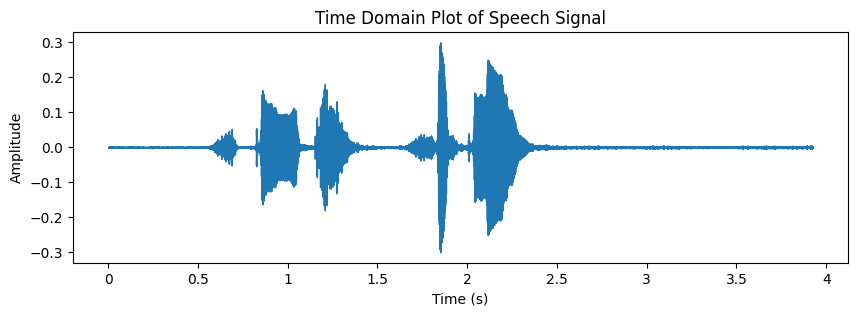

In [207]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(speech_file, sr=sr);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**WAVEFORM IN FREQUENCY DOMAIN:**

In [208]:
def magnitudeSpectrum(sound):
  sound_len = sound.shape[0]
  print(sound_len)
  sound_dtft = fft(sound)
  freqs = fftfreq(sound_len, 1/sr)
  freqs = freqs[0:sound_len//2]
  dtft_lin = np.abs(sound_dtft[0:sound_len//2])
  dtft_db = 20*np.log10(np.abs(sound_dtft[0:sound_len//2]))
  return freqs,dtft_lin,dtft_db

62802


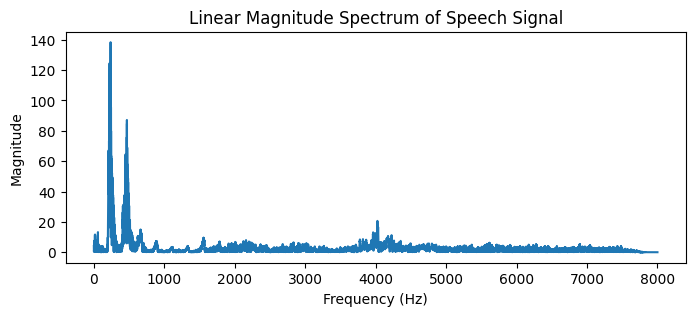

In [209]:
freqs,freq_lin,freq_db = magnitudeSpectrum(speech_file)
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of Speech Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

##**SHORT TERM ENERGY**

In [210]:
def short_term_energy(sound):
  FRAME_SIZE = 0.025
  FRAME_SHIFT = 0.010
  WINDOW_LENGTH = int(sr*FRAME_SIZE)
  WINDOW_SLIDE_WIDTH = int(sr*FRAME_SHIFT)
  sum=0
  No_of_frames = 1+int((len(sound)-WINDOW_LENGTH)/WINDOW_SLIDE_WIDTH)
  Short_term_energy = np.zeros(No_of_frames)
  for i in range(No_of_frames):
      for j in range(i*WINDOW_SLIDE_WIDTH,(i*WINDOW_SLIDE_WIDTH)+WINDOW_LENGTH):
        sum = sum + (sound[j]*sound[j])
      Short_term_energy[i] = sum
      sum =0
  return Short_term_energy

##**SHORT TERM ZERO CROSSING RATE**

In [211]:
def short_term_zero_crossing_rate(sound):
  FRAME_SIZE = 0.025
  FRAME_SHIFT = 0.010
  WINDOW_LENGTH = int(sr*FRAME_SIZE)
  WINDOW_SLIDE_WIDTH = int(sr*FRAME_SHIFT)
  zero_crossing_rate = librosa.feature.zero_crossing_rate(sound, frame_length=WINDOW_LENGTH, hop_length=WINDOW_SLIDE_WIDTH)
  return zero_crossing_rate
  plt.figure(figsize=(10, 6))
  plt.plot(zero_crossing_rate[0])
  plt.show()

##**DIFFERENT SOUNDS**

In [212]:
s = speech_file[int(0.4 * sr): int(0.79 * sr)]
ipd.Audio(s, rate=sr)

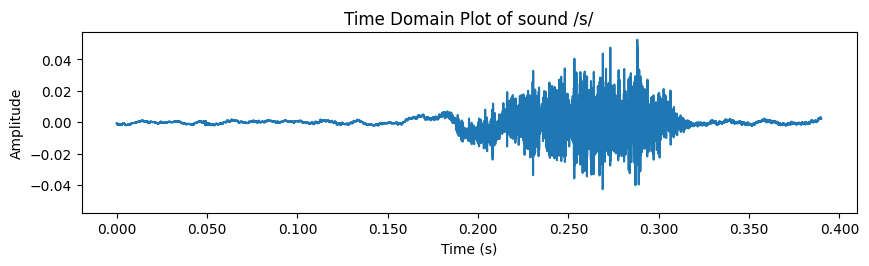

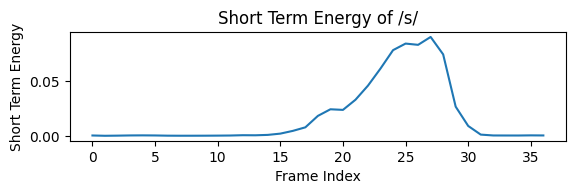

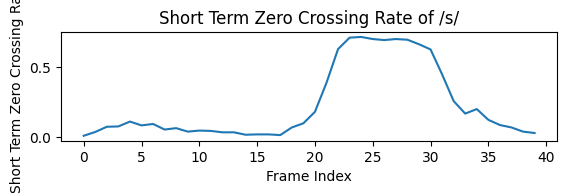

In [213]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.waveshow(s, sr=sr);
plt.title("Time Domain Plot of sound /s/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
s_energy = short_term_energy(s)
plt.subplot(3, 1, 2)
plt.plot(s_energy)
plt.title('Short Term Energy of /s/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Energy')
plt.show()
s_ZCR = short_term_zero_crossing_rate(s)
plt.subplot(3, 1, 3)
plt.plot(s_ZCR[0])
plt.title('Short Term Zero Crossing Rate of /s/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Zero Crossing Rate')
plt.show()

In [214]:
E = speech_file[int(0.855 * sr): int(1.15 * sr)]
ipd.Audio(E, rate=sr)

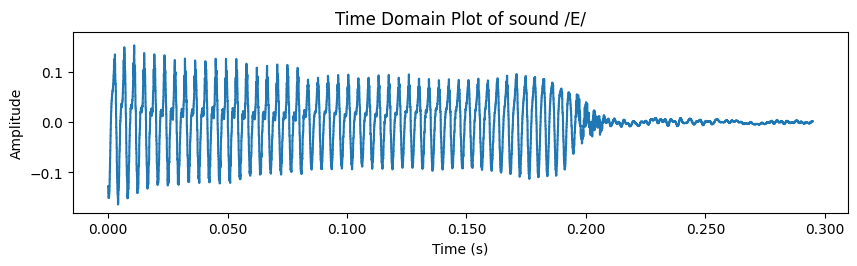

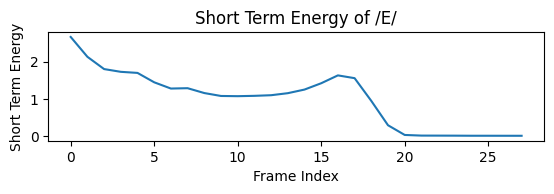

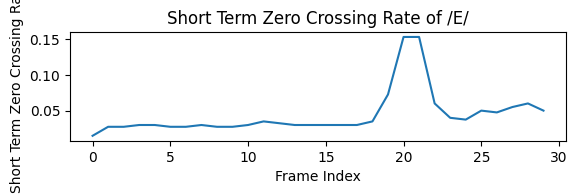

In [215]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.waveshow(E, sr=sr);
plt.title("Time Domain Plot of sound /E/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
E_energy = short_term_energy(E)
plt.subplot(3, 1, 2)
plt.plot(E_energy)
plt.title('Short Term Energy of /E/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Energy')
plt.show()
E_ZCR = short_term_zero_crossing_rate(E)
plt.subplot(3, 1, 3)
plt.plot(E_ZCR[0])
plt.title('Short Term Zero Crossing Rate of /E/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Zero Crossing Rate')
plt.show()

In [216]:
ch = speech_file[int(1.06 * sr): int(1.5 * sr)]
ipd.Audio(ch, rate=sr)

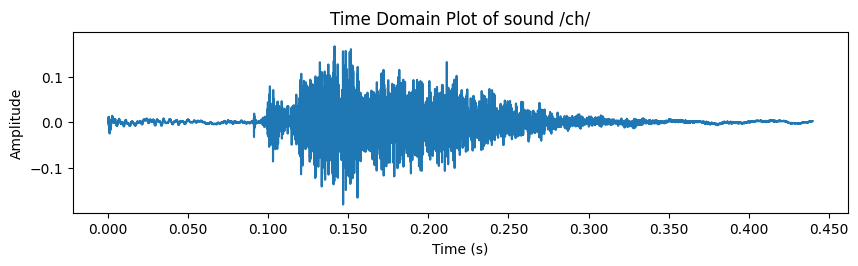

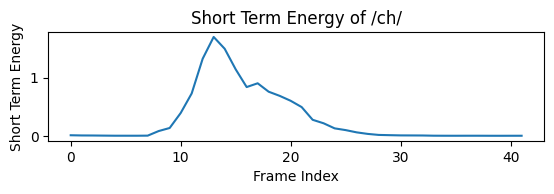

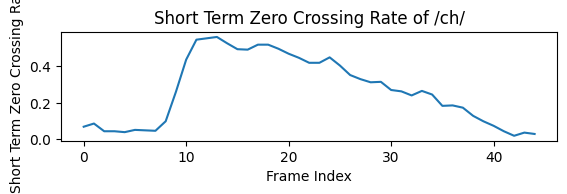

In [217]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.waveshow(ch, sr=sr);
plt.title("Time Domain Plot of sound /ch/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
ch_energy = short_term_energy(ch)
plt.subplot(3, 1, 2)
plt.plot(ch_energy)
plt.title('Short Term Energy of /ch/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Energy')
plt.show()
ch_ZCR = short_term_zero_crossing_rate(ch)
plt.subplot(3, 1, 3)
plt.plot(ch_ZCR[0])
plt.title('Short Term Zero Crossing Rate of /ch/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Zero Crossing Rate')
plt.show()

In [218]:
n = speech_file[int(2.1 * sr): int(2.2 * sr)]
ipd.Audio(n, rate=sr)
print(n.size)

1600


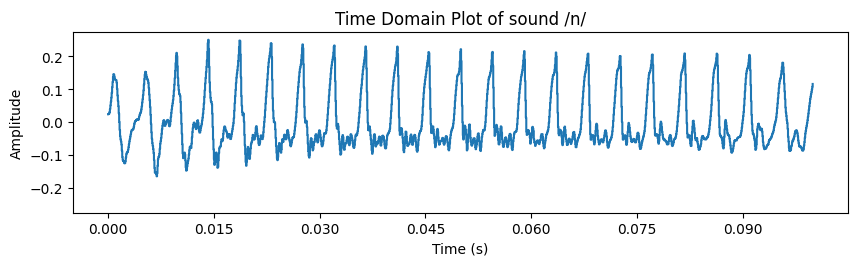

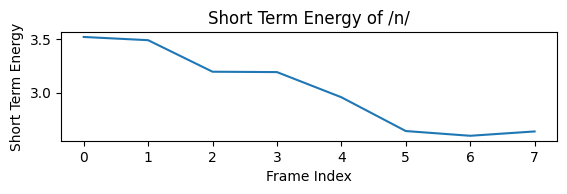

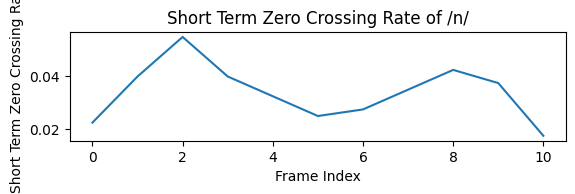

In [219]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.waveshow(n, sr=sr);
plt.title("Time Domain Plot of sound /n/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
n_energy = short_term_energy(n)
plt.subplot(3, 1, 2)
plt.plot(n_energy)
plt.title('Short Term Energy of /n/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Energy')
plt.show()
n_ZCR = short_term_zero_crossing_rate(n)
plt.subplot(3, 1, 3)
plt.plot(n_ZCR[0])
plt.title('Short Term Zero Crossing Rate of /n/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Zero Crossing Rate')
plt.show()

In [220]:
silence = speech_file[int(1.45 * sr): int(1.65 * sr)]
ipd.Audio(silence, rate=sr)

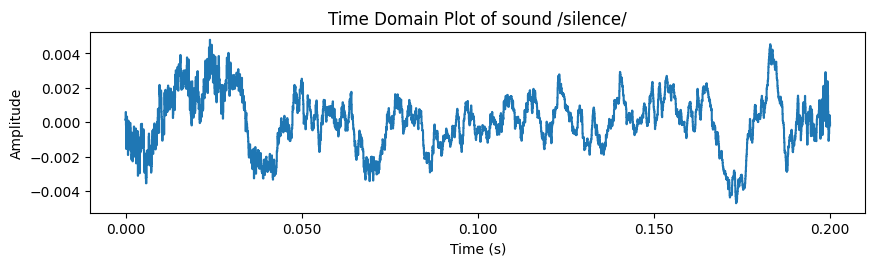

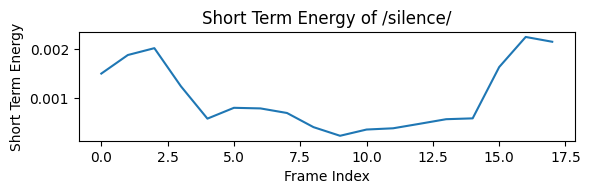

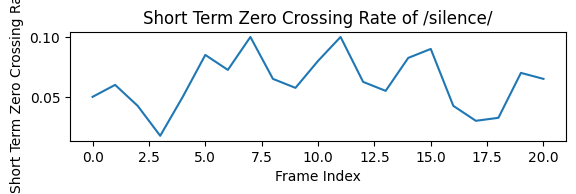

In [221]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.waveshow(silence, sr=sr);
plt.title("Time Domain Plot of sound /silence/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
silence_energy = short_term_energy(silence)
plt.subplot(3, 1, 2)
plt.plot(silence_energy)
plt.title('Short Term Energy of /silence/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Energy')
plt.show()
silence_ZCR = short_term_zero_crossing_rate(silence)
plt.subplot(3, 1, 3)
plt.plot(silence_ZCR[0])
plt.title('Short Term Zero Crossing Rate of /silence/')
plt.xlabel('Frame Index')
plt.ylabel('Short Term Zero Crossing Rate')
plt.show()